## Getting Started
Importing libraries

In [4]:
# No DS without pd
import pandas as pd

# Import Matplotlib library and assigns shorthand 'plt'
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Easier to build graphs with dates with the help of mdates
# Imports Seaborn library and assigns shorthand 'sns'
import seaborn as sns
# Imports Plotly library and assigns shorthand 'px'
import plotly.express as px
# Imports Numpy library and assigns shorthand 'np'
import numpy as np

######## Shit below doesn't work########
# SQLite to not have to use a whole SQL Workbench but just runs out of a class, easier to code with
import sqlite3
# SQLite doesn't like mySQL format so I need to parse it
import pymysql
# pandassql lets you execute commands like in mySQL and is able to read stuff into an mySQL DB and converts it directly into a pd df
from pandasql import sqldf

## 1. Business Understanding
### Objective
The goal of this project is to understand and forecast product demand of a mexican toy store across different stores based on the internal company dataset.  
The dataset includes sales transactions, store information, inventory records, product details, and a calendar that helps align daily sales with time-based patterns such as holidays or promotions.

### Business Context
Fluctuations in demand directly impact how well stock levels, staffing, and promotions are planned.  
Without proper forecasting, stores risk overstocking slow-moving items or running out of high-demand products, both of which reduce operational efficiency.

### Analytical Objective
By analyzing historical sales patterns together with contextual data (store type, product category, inventory availability, and calendar effects), this project aims to build a data-driven demand forecasting model.  
The insights will support decisions in inventory planning, resource allocation, and promotional timing.

### Success Criteria
- **Quantitative:** Low forecast error (e.g., RMSE / MAPE) and stable model performance across stores.  
- **Qualitative:** Forecast outputs provide clear, actionable insights that can be used for planning stock, workforce, and logistics activities.


## 2. Data Understanding
This chapter is the initiialization of the mySQL DB and converts it into an pd df
This chapter does the first analysation of the DB

### 2.1 Initial data report
Reading data (train, test store)

In [5]:
# Create DB with SQLite
# HOST: Localhost DB_Name: mexico_toy_store_wh_db

# Create a connection to a newly created local database
# conn = sqlite3.connect("mexico_toy_store_wh_db.db")
# cursor = conn.cursor()

# # Read your SQL file
# with open(r"../sql/mexico_toy_store_wh_db.sql", 'r', encoding='utf-8') as f:
#     sql_script = f.read()

# # Execute all SQL commands in the file
# cursor.executescript(sql_script)
# conn.commit()


In [6]:
# I just read the CSV files in until we got the connection properly working
base_path = r'../data/'

calendar_df = pd.read_csv(base_path + 'calendar.csv')
# data_dictionary_df = pd.read_csv(base_path + 'data_dictionary.csv')  # Not needed useless reference guide
#tran and test data
df_train = pd.read_csv(base_path + 'rossmann-stroe-sales/train.csv')
df_test = pd.read_csv(base_path + 'rossmann-stroe-sales/test.csv')
# the additional store data
inventory_df = pd.read_csv(base_path + 'inventory.csv')
products_df = pd.read_csv(base_path + 'products.csv')
sales_df = pd.read_csv(base_path + 'sales.csv')
stores_df = pd.read_csv(base_path + 'stores.csv')

C:\Users\reser\AppData\Local\Temp\ipykernel_12648\2533034112.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(base_path + 'rossmann-stroe-sales/train.csv')


### 2.2 Describing data (train, test, store)
Train data
Test data
Store data

In [7]:
# Delete comment about whatever you want to have more insights, some are still missing the print commands

#print(calendar_df.shape)
print(calendar_df.head())
#calendar_df.tail()
calendar_df.info()
#print(calendar_df.describe())
print(calendar_df.describe(include=object))
#print(calendar_df.dtypes)
print('_________________________________________________________________________________')
sales_df.shape
print(sales_df.head())
#sales_df.tail()
sales_df.info()
sales_df.describe()
sales_df.describe(include=object)
sales_df.dtypes
print('_________________________________________________________________________________')
inventory_df.shape
print(inventory_df.head())
#inventory_df.tail()
inventory_df.info()
inventory_df.describe()
#inventory_df.describe(include=object) # Throws ERROR: ValueError: No objects to concatenate
inventory_df.dtypes
print('_________________________________________________________________________________')
products_df.shape
print(products_df.head())
#products_df.tail()
products_df.info()
products_df.describe()
products_df.describe(include=object)
products_df.dtypes
print('_________________________________________________________________________________')
stores_df.shape
print(stores_df.head())
#stores_df.tail()
stores_df.info()
stores_df.describe()
stores_df.describe(include=object)
stores_df.dtypes
    

       Date
0  1/1/2022
1  1/2/2022
2  1/3/2022
3  1/4/2022
4  1/5/2022
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    638 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
            Date
count        638
unique       638
top     1/1/2022
freq           1
_________________________________________________________________________________
   Sale_ID        Date  Store_ID  Product_ID  Units
0        1  2022-01-01        24           4      1
1        2  2022-01-01        28           1      1
2        3  2022-01-01         6           8      1
3        4  2022-01-01        48           7      1
4        5  2022-01-01        44          18      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   

Store_ID            int64
Store_Name         object
Store_City         object
Store_Location     object
Store_Open_Date    object
dtype: object

Data looks good! No NULL values as it seems, which already looks like most of the data can be used. The connection of the Database could look like something like this:



### 2.3 Verify data quality
In this section we take a look at the quality of the data. Cleaning up for NULL values and dublicates.
#### 2.3.1 Missing values / Completeness

In [8]:
# Making sure that there is really no null values, calendar is beeing skipped, because there isn't really anyhing useful in there
print(sales_df.isnull().sum())
print(products_df.isnull().sum())
print(stores_df.isnull().sum())
print(inventory_df.isnull().sum())

Sale_ID       0
Date          0
Store_ID      0
Product_ID    0
Units         0
dtype: int64
Product_ID          0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
dtype: int64
Store_ID           0
Store_Name         0
Store_City         0
Store_Location     0
Store_Open_Date    0
dtype: int64
Store_ID         0
Product_ID       0
Stock_On_Hand    0
dtype: int64


In [9]:
# Making sure that there isn't dublicated values
print(sales_df.duplicated().sum())
print(products_df.duplicated().sum())
print(stores_df.duplicated().sum())
print(inventory_df.duplicated().sum())

0
0
0
0


In [10]:
# Checking for stores which haven't made any sales
sales_with_open = sales_df.merge(stores_df[['Store_ID', 'Store_Open_Date']], on='Store_ID', how='left')

open_zero_sales = sales_with_open[
    (sales_with_open['Date'] >= sales_with_open['Store_Open_Date']) &
    (sales_with_open['Units'] == 0)
]

print(open_zero_sales.shape, open_zero_sales.head())
print('_________________________________________________________________________________')
# Proofing validity by checking the opposite case, which has to have results
validity_check = sales_with_open[
    (sales_with_open['Date'] >= sales_with_open['Store_Open_Date']) &
    (sales_with_open['Units'] != 0)
]

print(validity_check.shape)
print(validity_check.head())

(0, 6) Empty DataFrame
Columns: [Sale_ID, Date, Store_ID, Product_ID, Units, Store_Open_Date]
Index: []
_________________________________________________________________________________
(829262, 6)
   Sale_ID        Date  Store_ID  Product_ID  Units Store_Open_Date
0        1  2022-01-01        24           4      1      2010-07-31
1        2  2022-01-01        28           1      1      2011-04-01
2        3  2022-01-01         6           8      1      2003-12-13
3        4  2022-01-01        48           7      1      2016-03-23
4        5  2022-01-01        44          18      1      2014-12-27


In [11]:
# Checking for stores which haven't opened yet
closed_stores = sales_with_open[sales_with_open['Date'] < sales_with_open['Store_Open_Date']]
print(closed_stores.shape)

(0, 6)


In [12]:
# Checking for referal integretiy
missing_prod = sales_df[~sales_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = sales_df[~sales_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Missing sales --> prod references: {missing_prod.shape} and missing sales --> store references: {missing_store.shape}')
missing_prod = inventory_df[~inventory_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = inventory_df[~inventory_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Missing inventory --> prod references: {missing_prod.shape} and missing inventory --> store references: {missing_store.shape}')
print('_________________________________________________________________________________')
# Verification that the function works, by deleting the 'not' aka ~
missing_prod = sales_df[sales_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = sales_df[sales_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Not missing sales --> prod references: {missing_prod.shape} and not missing sales --> store references: {missing_store.shape}')
missing_prod = inventory_df[inventory_df['Product_ID'].isin(products_df['Product_ID'])]
missing_store = inventory_df[inventory_df['Store_ID'].isin(stores_df['Store_ID'])]
print(f'Not missing inventory --> prod references: {missing_prod.shape} and not missing inventory --> store references: {missing_store.shape}')

Missing sales --> prod references: (0, 5) and missing sales --> store references: (0, 5)
Missing inventory --> prod references: (0, 3) and missing inventory --> store references: (0, 3)
_________________________________________________________________________________
Not missing sales --> prod references: (829262, 5) and not missing sales --> store references: (829262, 5)
Not missing inventory --> prod references: (1593, 3) and not missing inventory --> store references: (1593, 3)


In [13]:
# Checking for negative values which just don't make any sense in a sales dataset
print("Negative units:", (sales_df['Units'] < 0).sum())
print("Negative stock:", (inventory_df['Stock_On_Hand'] < 0).sum())
#print("Negative or zero price:", (products_df['Product_Price'] <= 0).sum()) # Encountering an ERROR, Product_Price is storred as Str

Negative units: 0
Negative stock: 0


In [14]:
# Converting Str to float
products_df['Product_Price'] = products_df['Product_Price'].str.replace('$', '').astype(float)
products_df['Product_Price'] = products_df['Product_Price'].astype(float)
#print(products_df['Product_Price']) # Replacing Str with float works well, when error, just load the import of the data again

products_df['Product_Cost'] = products_df['Product_Cost'].str.replace('$', '').astype(float)
products_df['Product_Cost'] = products_df['Product_Cost'].astype(float)
#print(products_df['Product_Cost']) 

In [15]:
# Continue checking for values which just don't make any sense
print("Negative or zero price:", (products_df['Product_Price'] <= 0).sum())
print("Price < Cost:", (products_df['Product_Price'] < products_df['Product_Cost']).sum())

Negative or zero price: 0
Price < Cost: 0


In [16]:
# Realized that all the dates are storred as String resulting in conversion to UNIX dates when used with matplotlib
# All dates are converted to datetime64
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')
stores_df['Store_Open_Date'] = pd.to_datetime(stores_df['Store_Open_Date'], errors='coerce')
print(f'Sales date datatype: {sales_df['Date'].dtypes} and store open date datatype: {stores_df['Store_Open_Date'].dtypes}')

Sales date datatype: datetime64[ns] and store open date datatype: datetime64[ns]


The dataset looks already very clean when it comes to the obvious issues, the prices in the products dataframe where changed to float, that they are comparable. For clarification all floats are ment to be in USD.
We checked now for:
- Any NULL values and didn't find any
- Any dublicates and didn't find any
- Any shops which have 0 sales (No)
- Are there shops which aren't open yet (No)
- Do all foreign keys have a primary key (Yes)
- Is there any negative stock or sales (No)
- Are there any prices which don't make sense (No)

#### 2.3.2 Outliers detection / Accuracy

In total dates:  (638,)


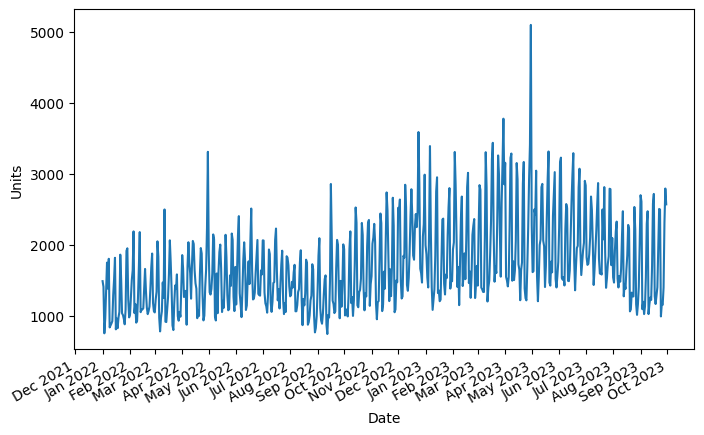

In [17]:
# Look for outliers in demand per day, by aggregating all units sold across all stores sorted per date
daily_sales = sales_df.groupby('Date')['Units'].sum()
print("In total dates: ", daily_sales.shape)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(daily_sales)
ax.set_xlabel("Date")
ax.set_ylabel("Units")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()  # rotates nicely

plt.show()

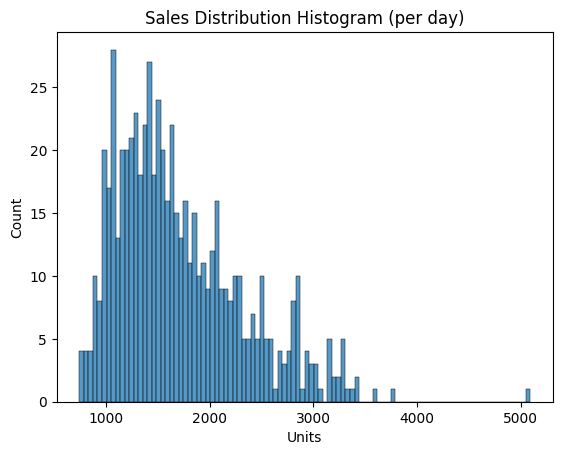

In [18]:
# Plot sales distribution, there is no shop with zero sales as awnsered in the section before
sns.histplot(daily_sales, bins=100)
plt.title('Sales Distribution Histogram (per day)')
plt.show()

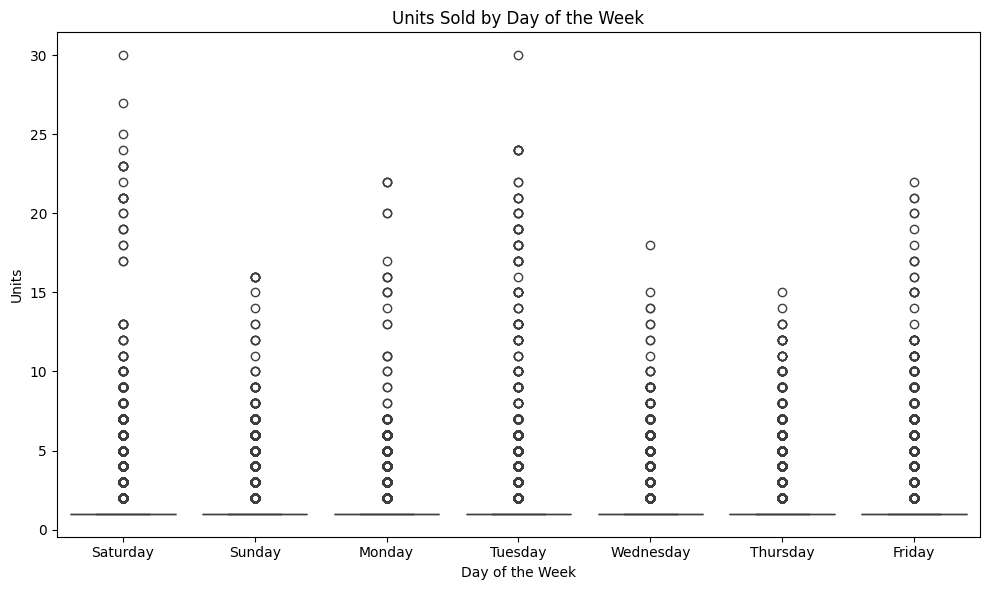

In [28]:
# Boxplot for sales by day of the week
sales_df['DayOfWeek'] = sales_df['Date'].dt.day_name()

plt.figure(figsize=(10,6))
sns.boxplot(x='DayOfWeek', y='Units', data=sales_df)
plt.title('Units Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Units')
plt.tight_layout()
plt.show()

## Data Prept Delete rows from train data for closed stores
2.3.3 Data Quality Report

In [20]:
# ---------------------------------------------
# 2.3.3 DATA PREP – DELETE ROWS FOR CLOSED STORES
# ---------------------------------------------

# A store is "closed" when Open = 0
# If a store is closed, Sales = 0, and these rows are not useful for training

print("Initial training data shape:", df_train.shape)

# Remove closed store rows
df_train_clean = df_train[df_train['Open'] == 1].copy()

# Also remove rows with Sales = 0 (non-informative)
df_train_clean = df_train_clean[df_train_clean['Sales'] > 0]

print("After removing closed stores and 0-sales rows:", df_train_clean.shape)
print("Number of removed rows:", len(df_train) - len(df_train_clean))


# ---------------------------------------------
# 2.3.3 DATA QUALITY REPORT
# ---------------------------------------------

import pandas as pd

def data_quality_report(df):
    """
    Generates a clean, readable data quality report:
    - Column name
    - Data type
    - Missing values
    - Unique values
    - % missing
    """
    report = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "Missing %": ((df.isnull().sum() / len(df)) * 100).round(2).values,
        "Unique Values": df.nunique().values
    })

    return report

print("\n*** DATA QUALITY REPORT: TRAIN DATA ***\n")
dqr_train = data_quality_report(df_train_clean)
display(dqr_train)

print("\n*** DATA QUALITY REPORT: STORE DATA ***\n")
dqr_stores = data_quality_report(stores_df)
display(dqr_stores)

print("\n*** DATA QUALITY REPORT: SALES DATA ***\n")
dqr_sales = data_quality_report(sales_df)
display(dqr_sales)


Initial training data shape: (1017209, 9)
After removing closed stores and 0-sales rows: (844338, 9)
Number of removed rows: 172871

*** DATA QUALITY REPORT: TRAIN DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Store,int64,0,0.0,1115
1,DayOfWeek,int64,0,0.0,7
2,Date,object,0,0.0,942
3,Sales,int64,0,0.0,21733
4,Customers,int64,0,0.0,4083
5,Open,int64,0,0.0,1
6,Promo,int64,0,0.0,2
7,StateHoliday,object,0,0.0,5
8,SchoolHoliday,int64,0,0.0,2



*** DATA QUALITY REPORT: STORE DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Store_ID,int64,0,0.0,50
1,Store_Name,object,0,0.0,50
2,Store_City,object,0,0.0,29
3,Store_Location,object,0,0.0,4
4,Store_Open_Date,datetime64[ns],0,0.0,50



*** DATA QUALITY REPORT: SALES DATA ***



,Column,Data Type,Missing Values,Missing %,Unique Values
0,Sale_ID,int64,0,0.0,829262
1,Date,datetime64[ns],0,0.0,638
2,Store_ID,int64,0,0.0,50
3,Product_ID,int64,0,0.0,35
4,Units,int64,0,0.0,27
5,DayOfWeek,object,0,0.0,7


## 2.4 First Data Exploration

Training Data Shape: (844338, 9)
Test Data Shape: (41088, 8)

--- TRAIN DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Open           844338 non-null  int64 
 6   Promo          844338 non-null  int64 
 7   StateHoliday   844338 non-null  object
 8   SchoolHoliday  844338 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 64.4+ MB

--- STORE DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Store_ID         50 non-null     in

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000



--- UNIQUE VALUES IN CATEGORICAL COLUMNS ---
StateHoliday: ['0' 'a' 'b' 'c' 0]
Promo: [1 0]
SchoolHoliday: [1 0]
DayOfWeek: [5 4 3 2 1 7 6]

Date Range in Training Data:
Minimum date: 2013-01-01 00:00:00
Maximum date: 2015-07-31 00:00:00


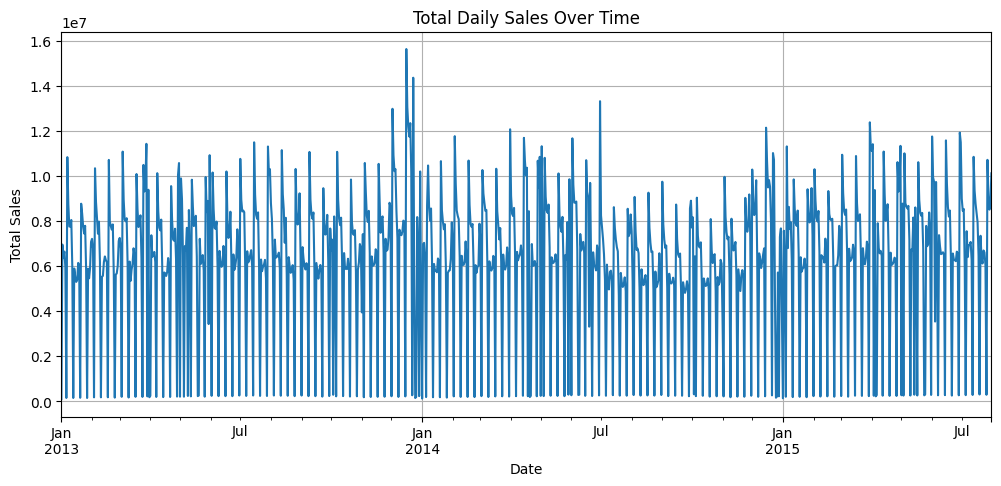

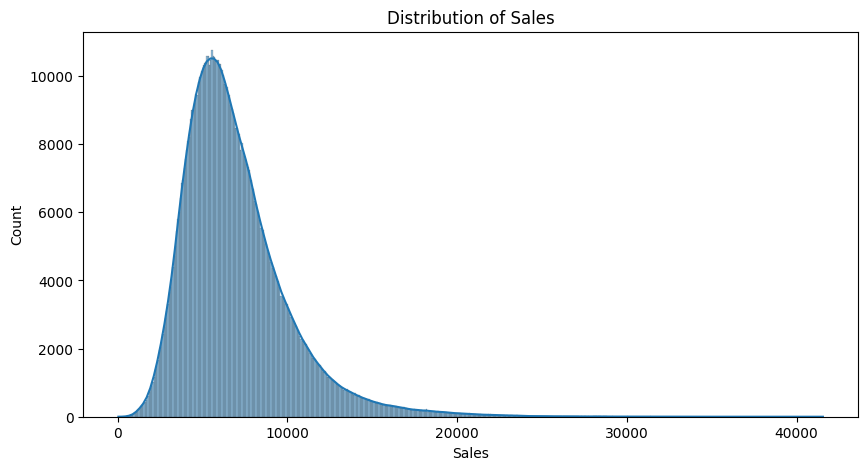

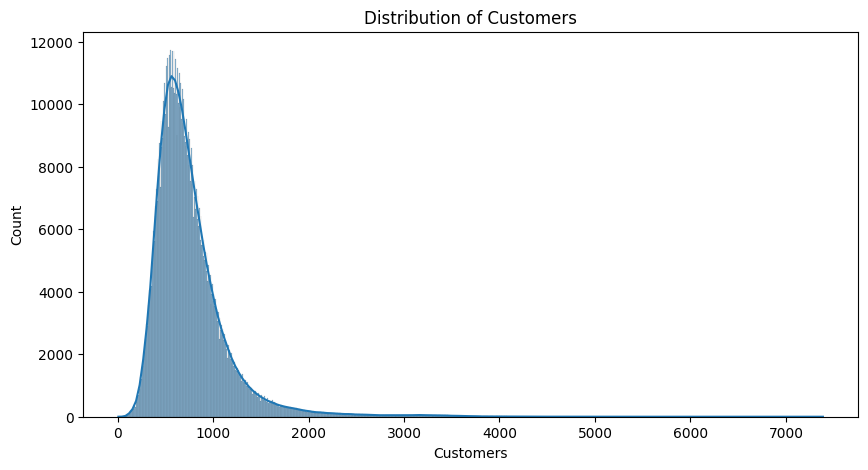

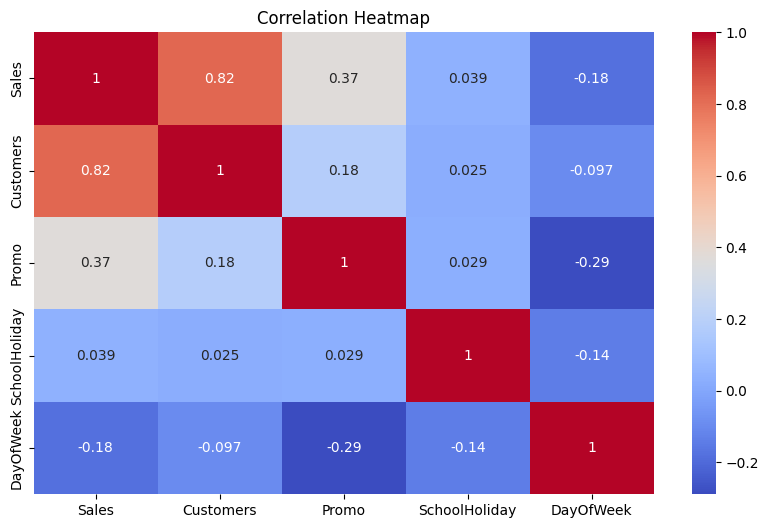

In [21]:
# ---------------------------------------------
# 2.4 FIRST DATA EXPLORATION
# ---------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Basic structure of the dataset
print("Training Data Shape:", df_train_clean.shape)
print("Test Data Shape:", df_test.shape)

print("\n--- TRAIN DATA INFO ---")
df_train_clean.info()

print("\n--- STORE DATA INFO ---")
stores_df.info()

print("\n--- SALES DATA INFO ---")
sales_df.info()


# ---------------------------------------------
# CHECK MISSING VALUES
# ---------------------------------------------
print("\nMissing Values in TRAIN DATA:")
print(df_train_clean.isnull().sum())

print("\nMissing Values in STORE DATA:")
print(stores_df.isnull().sum())

print("\nMissing Values in SALES DATA:")
print(sales_df.isnull().sum())


# ---------------------------------------------
# BASIC STATISTICS
# ---------------------------------------------
print("\n--- TRAINING DATA SUMMARY STATISTICS ---")
display(df_train_clean.describe())


# ---------------------------------------------
# UNIQUE VALUES CHECK
# ---------------------------------------------
categorical_cols = ['StateHoliday', 'Promo', 'SchoolHoliday', 'DayOfWeek']

print("\n--- UNIQUE VALUES IN CATEGORICAL COLUMNS ---")
for col in categorical_cols:
    print(f"{col}: {df_train_clean[col].unique()}")


# ---------------------------------------------
# DATE COLUMN EXPLORATION
# ---------------------------------------------

# Convert Date columns (if not already converted)
df_train_clean['Date'] = pd.to_datetime(df_train_clean['Date'])
df_test['Date']        = pd.to_datetime(df_test['Date'])
sales_df['Date']       = pd.to_datetime(sales_df['Date'])
stores_df['Store_Open_Date'] = pd.to_datetime(stores_df['Store_Open_Date'], errors='coerce')

print("\nDate Range in Training Data:")
print("Minimum date:", df_train_clean['Date'].min())
print("Maximum date:", df_train_clean['Date'].max())


# ---------------------------------------------
# BASIC VISUAL EXPLORATION
# ---------------------------------------------

# Sales over time (high-level view)
plt.figure(figsize=(12,5))
df_train_clean.groupby('Date')['Sales'].sum().plot()
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.savefig("../graphs/2_4_1-Sales over time (high-level view).png", dpi=300, bbox_inches="tight")
plt.show()

# Sales distribution
plt.figure(figsize=(10,5))
sns.histplot(df_train_clean['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.savefig("../graphs/2_4_2-Distribution of Sales.png", dpi=300, bbox_inches="tight")
plt.show()

# Customers distribution
plt.figure(figsize=(10,5))
sns.histplot(df_train_clean['Customers'], kde=True)
plt.title("Distribution of Customers")
plt.savefig("../graphs/2_4_3-Distribution of Customers.png", dpi=300, bbox_inches="tight")
plt.show()


# ---------------------------------------------
# CORRELATION HEATMAP
# ---------------------------------------------
plt.figure(figsize=(10,6))
corr_cols = ['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'DayOfWeek']
sns.heatmap(df_train_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("../graphs/2_4_4-Correlation Heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


## 2.5 Data Preparation and further Data Exploration
Data Prepl Table Store, Column CompetitionDistance...
Data Prepl Table Store, Column Promo2SinceWeek...
Joining train and store data

In [22]:

# 2.5 Data Preparation and further Data Exploration
# Data Prep: Table Store (CompetitionDistance, Promo2...)
# Joining train and store data

import numpy as np
import pandas as pd
from datetime import datetime

# ===================================================
# 2.5.1 DATA PREP – STORE TABLE, COLUMN CompetitionDistance
# ===================================================

if 'CompetitionDistance' in stores_df.columns:
    print("Before cleaning CompetitionDistance:")
    print("  Missing values:", stores_df['CompetitionDistance'].isna().sum())
    print("  Min:", stores_df['CompetitionDistance'].min())
    print("  Max:", stores_df['CompetitionDistance'].max())

    # Common Rossmann approach:
    # - Replace missing CompetitionDistance with a large value or median
    # Here: use median so it remains realistic
    median_comp = stores_df['CompetitionDistance'].median()
    stores_df['CompetitionDistance'].fillna(median_comp, inplace=True)

    print("\nAfter cleaning CompetitionDistance:")
    print("  Missing values:", stores_df['CompetitionDistance'].isna().sum())
else:
    print("Column 'CompetitionDistance' not found in stores_df – skipping CompetitionDistance prep.")


# ===================================================
# 2.5.2 DATA PREP – STORE TABLE, Promo2SinceWeek / Promo2SinceYear / PromoInterval
# ===================================================

promo_cols = ['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

if any(col in stores_df.columns for col in promo_cols):
    print("\nPromo-related columns found in stores_df. Cleaning promo information...")

    # Fill NA for Promo2 as 0 (no continuous promo)
    if 'Promo2' in stores_df.columns:
        stores_df['Promo2'] = stores_df['Promo2'].fillna(0).astype(int)

    # Fill NA for Promo2SinceWeek / Promo2SinceYear with 0 (means no promo2 start)
    if 'Promo2SinceWeek' in stores_df.columns:
        stores_df['Promo2SinceWeek'] = stores_df['Promo2SinceWeek'].fillna(0).astype(int)

    if 'Promo2SinceYear' in stores_df.columns:
        stores_df['Promo2SinceYear'] = stores_df['Promo2SinceYear'].fillna(0).astype(int)

    # PromoInterval: fill missing with 'None'
    if 'PromoInterval' in stores_df.columns:
        stores_df['PromoInterval'] = stores_df['PromoInterval'].fillna('None')

    # Optionally: create a "Promo2StartDate" feature if both year & week exist
    if 'Promo2SinceWeek' in stores_df.columns and 'Promo2SinceYear' in stores_df.columns:
        def get_promo2_start(row):
            year = int(row['Promo2SinceYear'])
            week = int(row['Promo2SinceWeek'])
            if year == 0 or week == 0:
                return pd.NaT
            # ISO week to date: take Monday of that week
            return pd.to_datetime(f'{year}-W{week}-1', format='%G-W%V-%u', errors='coerce')

        stores_df['Promo2StartDate'] = stores_df.apply(get_promo2_start, axis=1)

        print("Sample Promo2StartDate values:")
        print(stores_df[['Store', 'Promo2', 'Promo2StartDate']].head())
else:
    print("No promo-related Rossmann-style columns (Promo2SinceWeek, Promo2SinceYear, PromoInterval) found – skipping promo prep.")


# ===================================================
# 2.5.3 JOINING TRAIN AND STORE DATA
# ===================================================

# Ensure the join key is aligned: we expect a column named 'Store' in both
if 'Store_ID' in stores_df.columns and 'Store' not in stores_df.columns:
    stores_df = stores_df.rename(columns={'Store_ID': 'Store'})

print("\nKeys available for join:")
print("  Train columns:", [c for c in df_train_clean.columns if 'Store' in c])
print("  Test columns:", [c for c in df_test.columns if 'Store' in c])
print("  Store columns:", [c for c in stores_df.columns if 'Store' in c])

# Merge train + store
df_train_store = df_train_clean.merge(stores_df, on='Store', how='left')
df_test_store  = df_test.merge(stores_df, on='Store', how='left')

print("\nAfter joining with store table:")
print("  df_train_store shape:", df_train_store.shape)
print("  df_test_store shape:", df_test_store.shape)

# Quick check for remaining missing values after join
print("\nMissing values in df_train_store (top 20 columns):")
print(df_train_store.isna().sum().sort_values(ascending=False).head(20))

print("\nMissing values in df_test_store (top 20 columns):")
print(df_test_store.isna().sum().sort_values(ascending=False).head(20))


Column 'CompetitionDistance' not found in stores_df – skipping CompetitionDistance prep.
No promo-related Rossmann-style columns (Promo2SinceWeek, Promo2SinceYear, PromoInterval) found – skipping promo prep.

Keys available for join:
  Train columns: ['Store']
  Test columns: ['Store']
  Store columns: ['Store', 'Store_Name', 'Store_City', 'Store_Location', 'Store_Open_Date']

After joining with store table:
  df_train_store shape: (844338, 13)
  df_test_store shape: (41088, 12)

Missing values in df_train_store (top 20 columns):
Store_Open_Date    806466
Store_Name         806466
Store_City         806466
Store_Location     806466
Store                   0
Customers               0
Sales                   0
Date                    0
DayOfWeek               0
SchoolHoliday           0
StateHoliday            0
Promo                   0
Open                    0
dtype: int64

Missing values in df_test_store (top 20 columns):
Store_Name         39216
Store_City         39216
Store_Locati

## 2.5.1 Distribution

Numerical columns used for distribution plots: ['Sales', 'Customers']


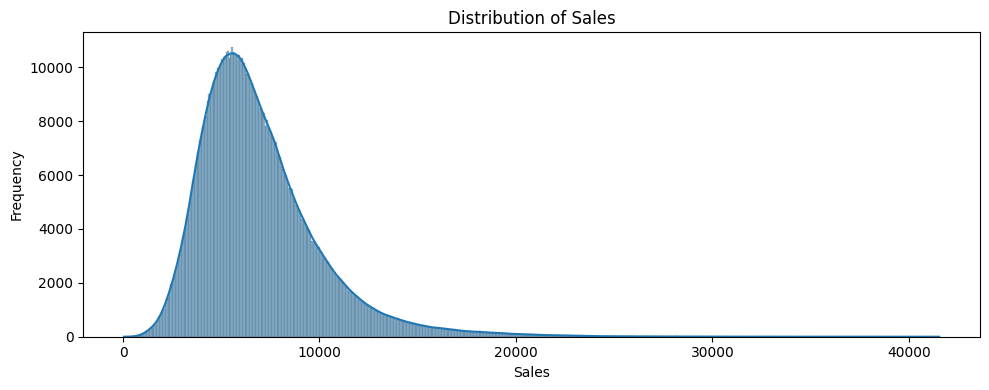

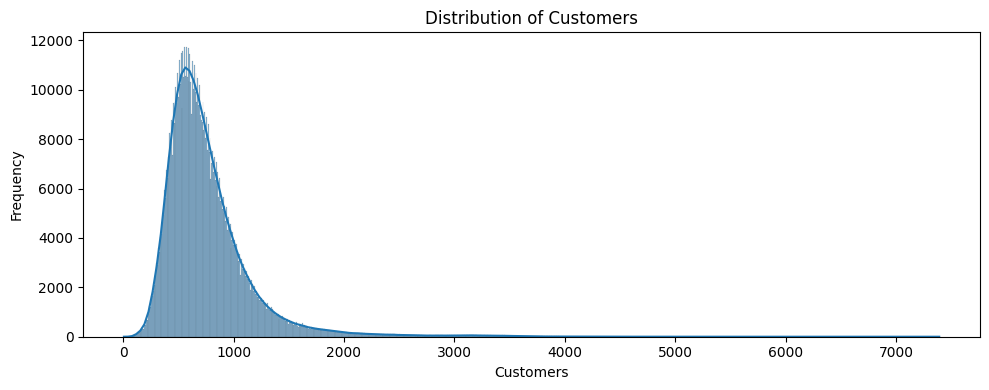

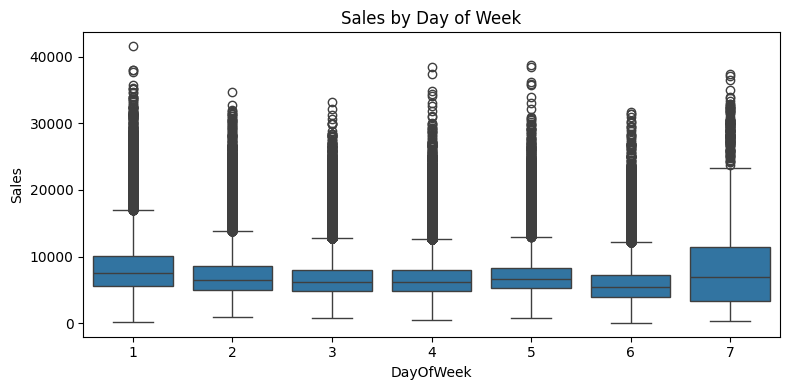

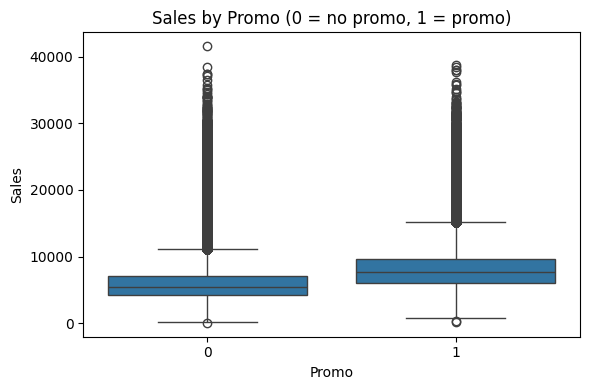

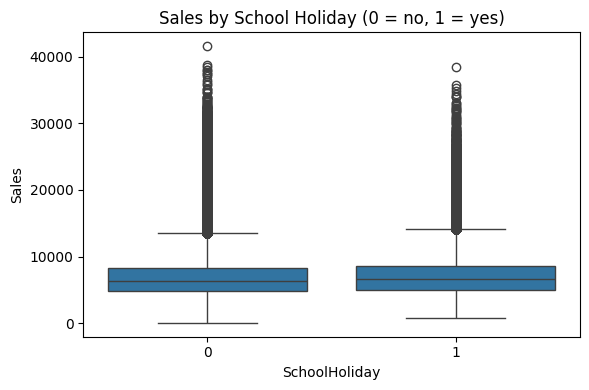

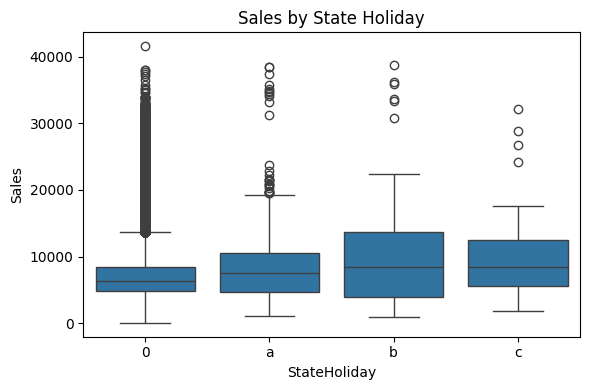

In [23]:
# ---------------------------------------------
# 2.5.1 Distribution
# ---------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Use the merged train+store dataset if available, else fallback
try:
    df_dist = df_train_store.copy()
except NameError:
    df_dist = df_train_clean.copy()

# Ensure Sales and Customers exist
num_cols = [col for col in ['Sales', 'Customers', 'CompetitionDistance'] if col in df_dist.columns]

print("Numerical columns used for distribution plots:", num_cols)

# ------------------------------------------------
# HISTOGRAMS + KDE FOR NUMERICAL FEATURES
# ------------------------------------------------
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df_dist[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig("../graphs/2_5_1_1-KDE FOR NUMERICAL FEATURES.png", dpi=300, bbox_inches="tight")
    plt.show()

# ------------------------------------------------
# BOX PLOTS – SALES BY CATEGORICAL FEATURES
# ------------------------------------------------

# Sales by DayOfWeek
if 'DayOfWeek' in df_dist.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_dist, x='DayOfWeek', y='Sales')
    plt.title("Sales by Day of Week")
    plt.tight_layout()
    plt.savefig("../graphs/2_5_1_2-Sales by DayOfWeek.png", dpi=300, bbox_inches="tight")
    plt.show()

# Sales by Promo
if 'Promo' in df_dist.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_dist, x='Promo', y='Sales')
    plt.title("Sales by Promo (0 = no promo, 1 = promo)")
    plt.tight_layout()
    plt.savefig("../graphs/2_5_1_3-Sales by Promo.png", dpi=300, bbox_inches="tight")
    plt.show()

# Sales by SchoolHoliday
if 'SchoolHoliday' in df_dist.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_dist, x='SchoolHoliday', y='Sales')
    plt.title("Sales by School Holiday (0 = no, 1 = yes)")
    plt.tight_layout()
    plt.savefig("../graphs/2_5_1_4-Sales by Promo.png", dpi=300, bbox_inches="tight")
    plt.show()

# Sales by StateHoliday
if 'StateHoliday' in df_dist.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_dist, x='StateHoliday', y='Sales')
    plt.title("Sales by State Holiday")
    plt.tight_layout()
    plt.savefig("../graphs/2_5_1_5-Sales by State Holiday.png", dpi=300, bbox_inches="tight")
    plt.show()


## 2.5.2 Correlations

Numeric columns used for correlation matrix:
['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']


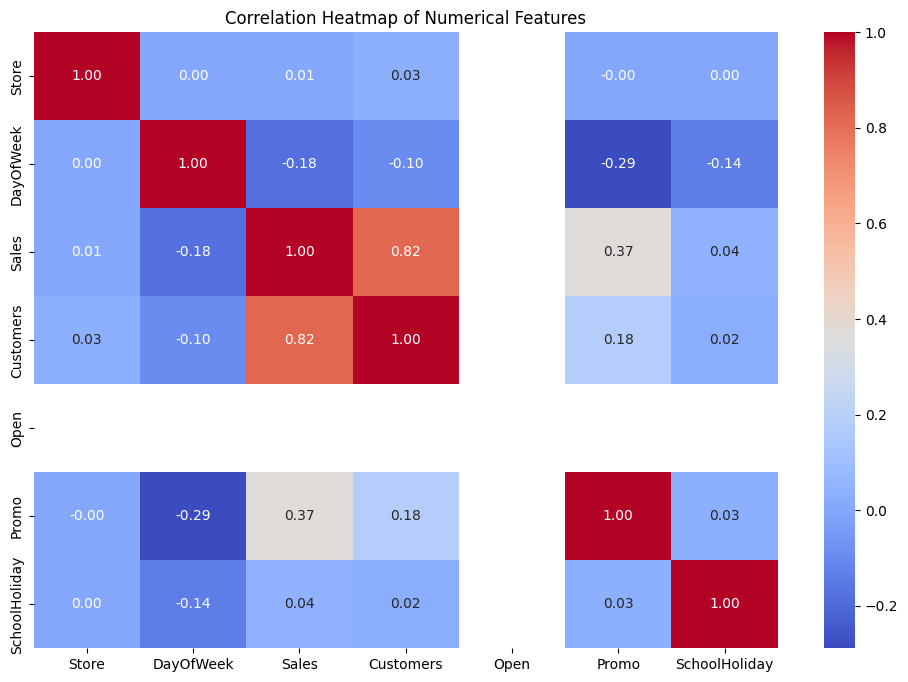


Top correlations with Sales:


Sales            1.000000
Customers        0.823552
Promo            0.368199
SchoolHoliday    0.038635
Store            0.007723
DayOfWeek       -0.178753
Open                  NaN
Name: Sales, dtype: float64


Generating pairplot for: ['Sales', 'Customers', 'Promo', 'DayOfWeek']


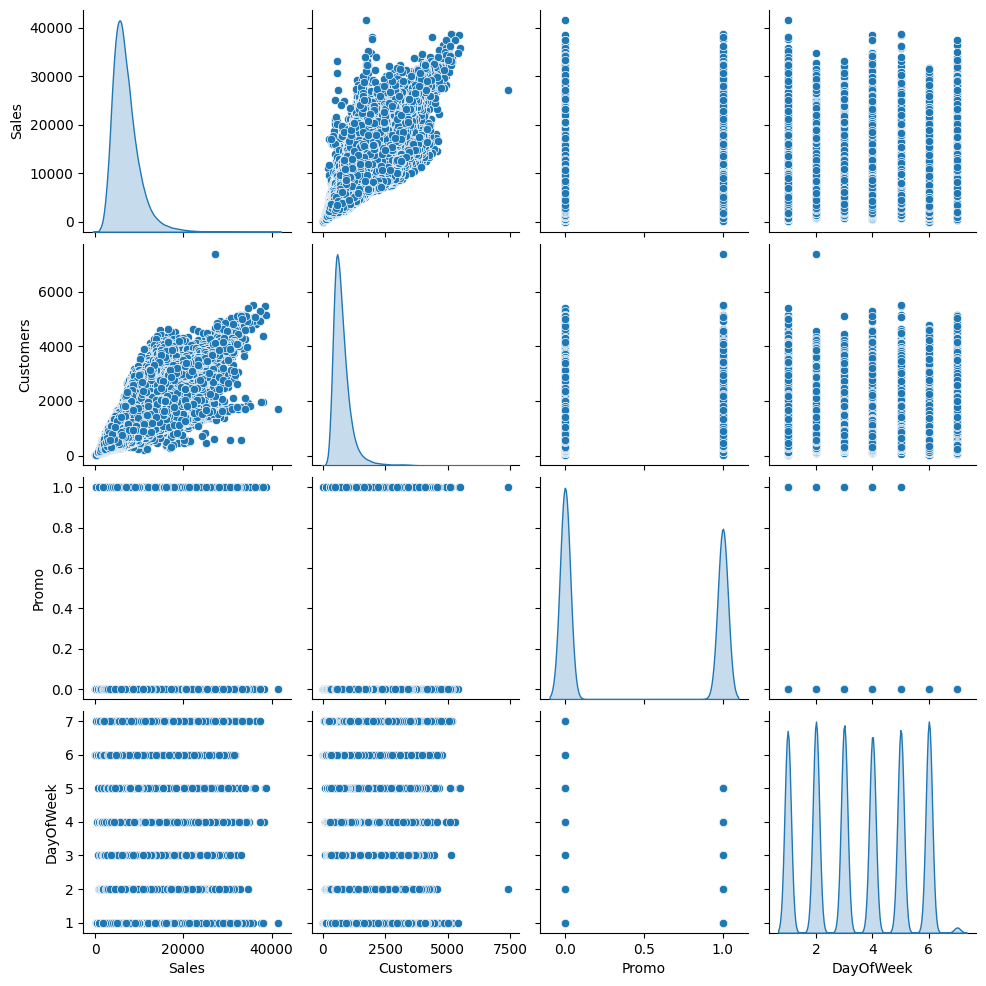


Store-level correlation analysis skipped (no store metadata available).


In [24]:

# 2.4.2 Correlations

import matplotlib.pyplot as plt
import seaborn as sns

# Use merged dataset if available, otherwise df_train_clean
try:
    df_corr = df_train_store.copy()
except NameError:
    df_corr = df_train_clean.copy()

# Select only numerical columns for correlation analysis
numeric_cols = df_corr.select_dtypes(include=['int64','float64']).columns.tolist()

print("Numeric columns used for correlation matrix:")
print(numeric_cols)


# CORRELATION MATRIX

corr_matrix = df_corr[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("../graphs/2_5_2_1-CORRELATION MATRIX BIG.png", dpi=300, bbox_inches="tight")
plt.show()


# STRONGEST CORRELATIONS WITH SALES

if 'Sales' in df_corr.columns:
    print("\nTop correlations with Sales:")
    display(corr_matrix['Sales'].sort_values(ascending=False))


# OPTIONAL PAIRPLOT (LIMITED TO KEY VARIABLES)

pairplot_cols = [col for col in ['Sales', 'Customers', 'Promo', 'CompetitionDistance', 'DayOfWeek'] 
                 if col in df_corr.columns]

if len(pairplot_cols) >= 2:
    print("\nGenerating pairplot for:", pairplot_cols)
    sns.pairplot(df_corr[pairplot_cols], diag_kind='kde')
    plt.savefig("../graphs/2_5_2_2-OPTIONAL PAIRPLOT.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("\nNot enough numerical columns available for pairplot.")


# STORE-LEVEL CORRELATIONS (IF STORE META EXISTS)
store_columns = ['Store', 'CompetitionDistance', 'Promo2', 'Promo2SinceWeek', 
                 'Promo2SinceYear', 'PromoInterval']

store_cols_available = [col for col in store_columns if col in df_corr.columns]

if len(store_cols_available) > 1:
    print("\nStore-level correlation subset:")
    display(df_corr[store_cols_available].corr())

    plt.figure(figsize=(10,6))
    sns.heatmap(df_corr[store_cols_available].corr(), annot=True, cmap='coolwarm')
    plt.title("Store Metadata Correlations")
    plt.savefig("../graphs/2_5_2_3-STORE-LEVEL CORRELATIONS.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("\nStore-level correlation analysis skipped (no store metadata available).")


## 2.5.3 Store level look

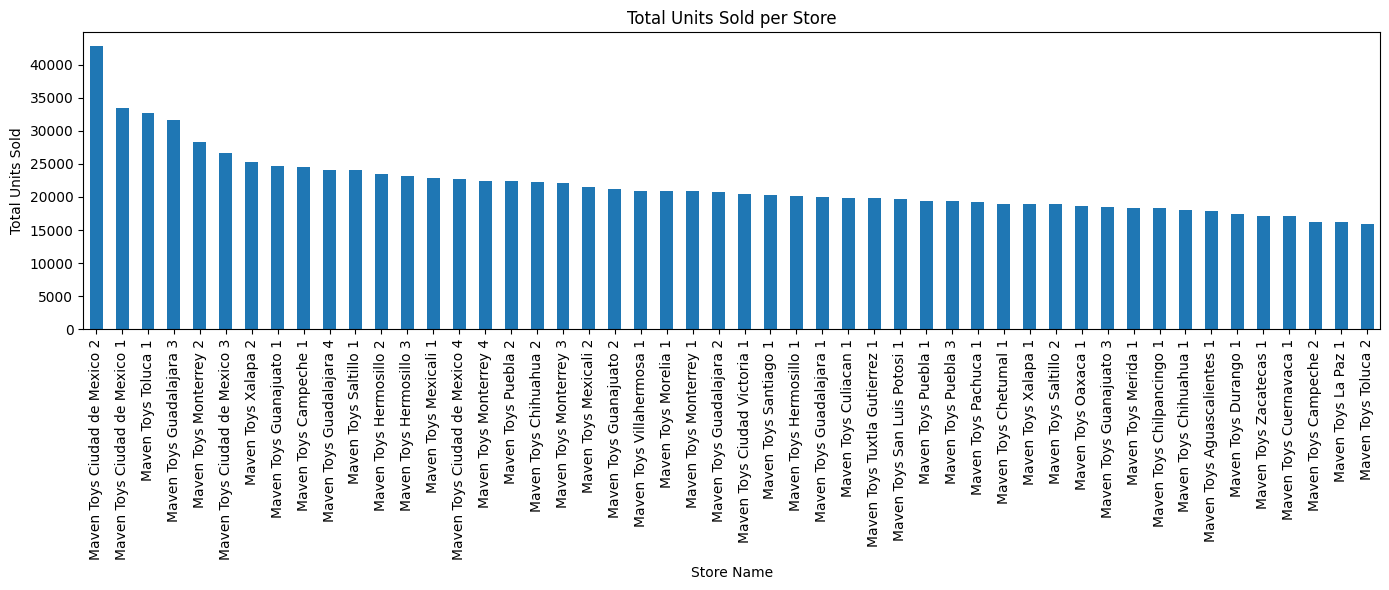

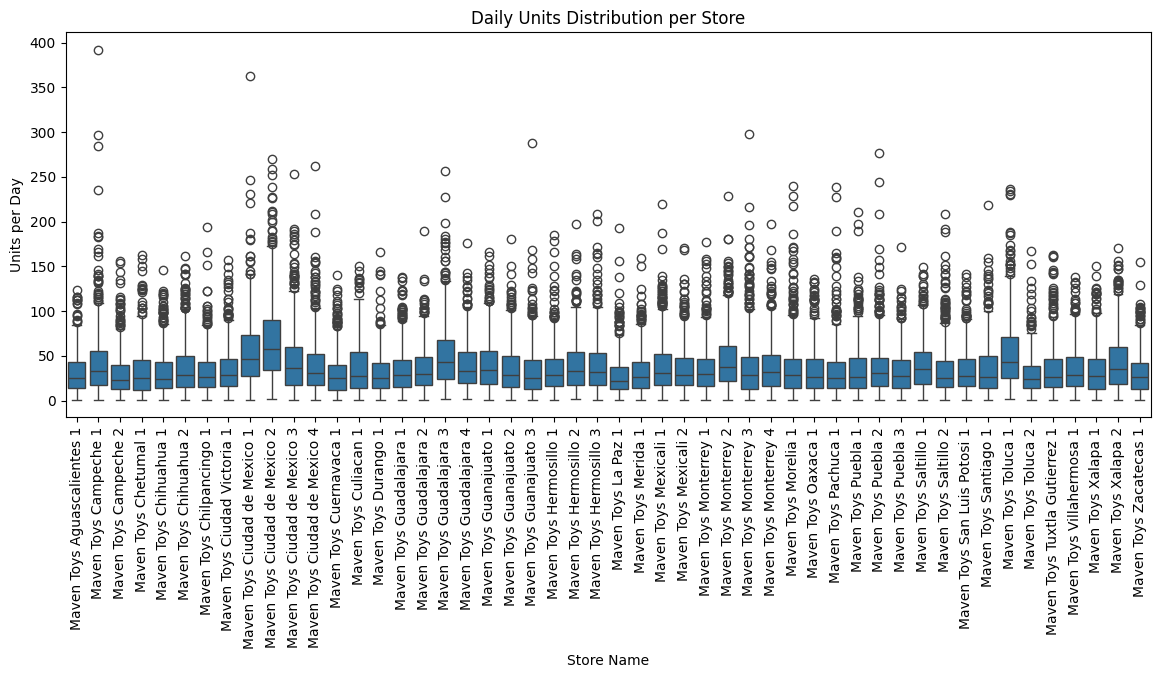

<Figure size 800x800 with 0 Axes>

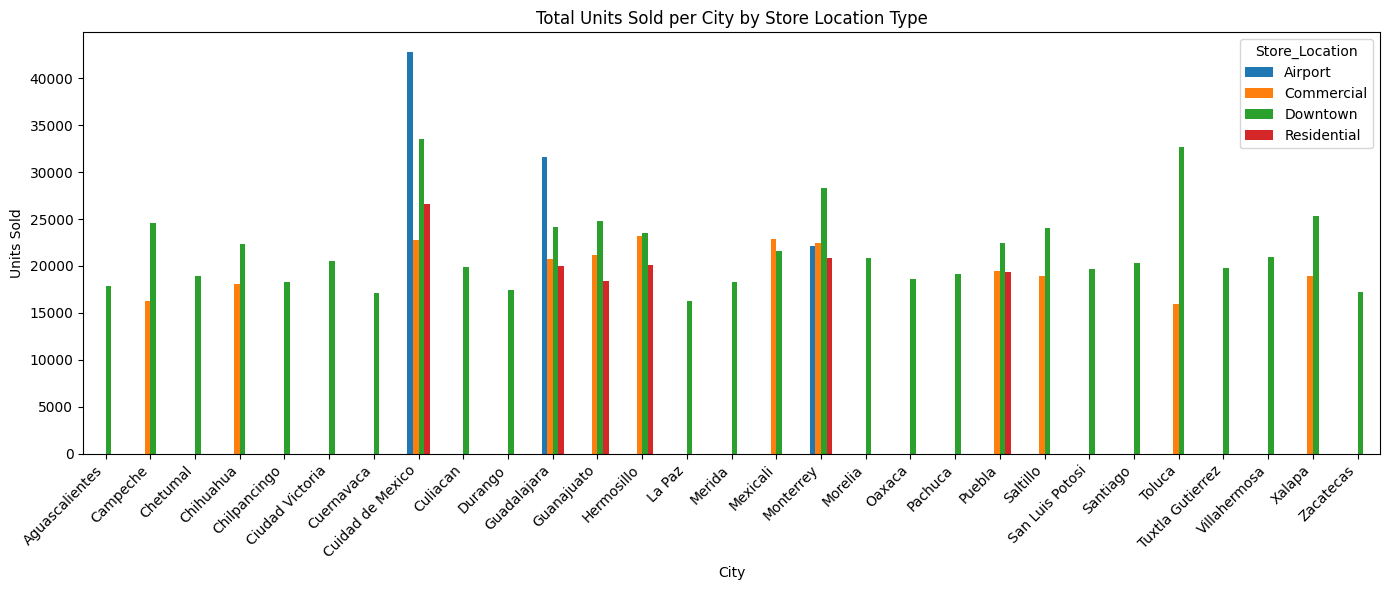

In [25]:
salesNstores= sales_df.merge(stores_df, left_on="Store_ID", right_on="Store", how="left")

# Sales per shop listed
units_per_store = salesNstores.groupby("Store_Name")["Units"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
units_per_store.plot(kind="bar")
plt.title("Total Units Sold per Store")
plt.xlabel("Store Name")
plt.ylabel("Total Units Sold")
plt.tight_layout()
plt.savefig("../graphs/2_5_3_1-Sales per Store.png", dpi=300, bbox_inches="tight")
plt.show()

# Sales per day in each shop
daily_store_units = salesNstores.groupby(["Store_Name", "Date"])["Units"].sum().reset_index()

plt.figure(figsize=(14,5))
sns.boxplot(data=daily_store_units, x="Store_Name", y="Units")
plt.title("Daily Units Distribution per Store")
plt.xlabel("Store Name")
plt.ylabel("Units per Day")
plt.xticks(rotation=90)
plt.savefig("../graphs/2_5_3_2-Sales per day for each shop.png", dpi=300, bbox_inches="tight")
plt.show()

# Sales per city devided in location parameters
city_loc = (
    salesNstores
    .groupby(["Store_City", "Store_Location"])["Units"]
    .sum()
    .reset_index()
)

city_loc_pivot = city_loc.pivot(index="Store_City", columns="Store_Location", values="Units").fillna(0)


plt.figure(figsize=(8,8))
city_loc_pivot.plot(kind="bar", figsize=(14,6))
plt.title("Total Units Sold per City by Store Location Type")
plt.xlabel("City")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../graphs/2_5_3_3-Total units sold per city and location.png", dpi=300, bbox_inches="tight")
plt.show()

## 2.5.4 Time-Series Analysis

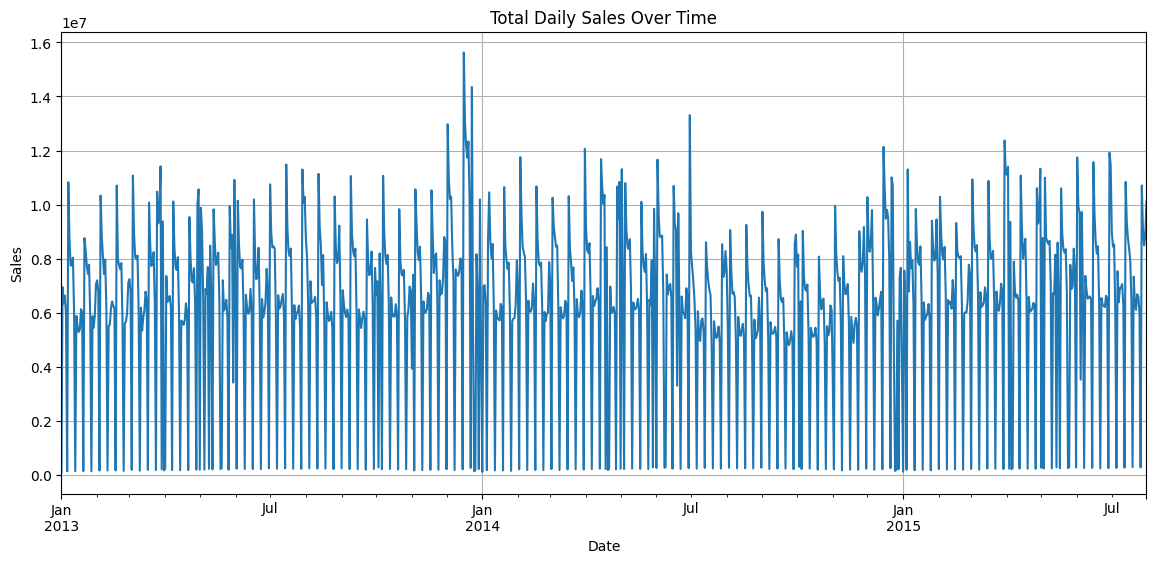

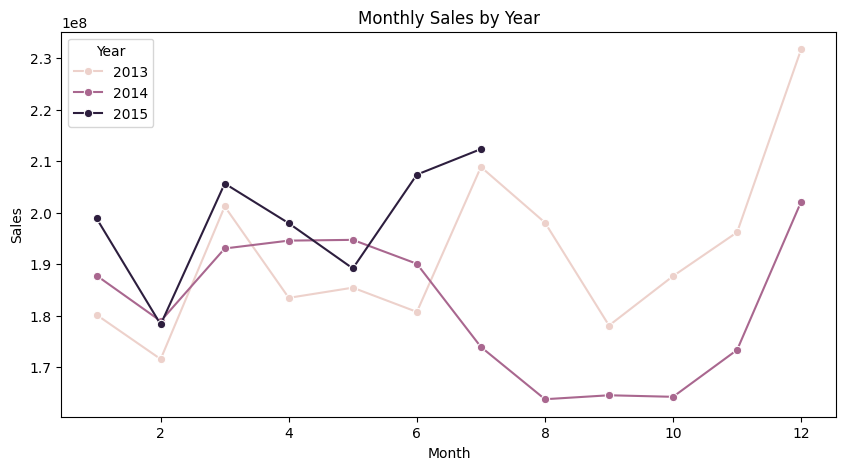

KeyboardInterrupt: 

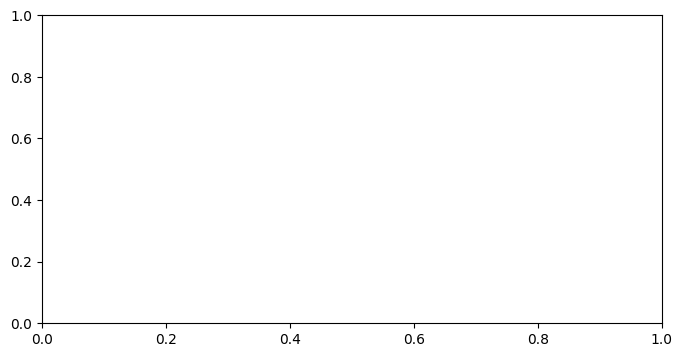

In [26]:

# 2.4.3 TIME-SERIES ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Use merged dataset if available
try:
    df_ts = df_train_store.copy()
except NameError:
    df_ts = df_train_clean.copy()

# Ensure Date is datetime
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

# TOTAL SALES OVER TIME

plt.figure(figsize=(14,6))
df_ts.groupby('Date')['Sales'].sum().plot()
plt.title("Total Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.savefig("../graphs/2_5_4_1-TOTAL SALES OVER TIME.png", dpi=300, bbox_inches="tight")
plt.show()


# SALES BY MONTH
df_ts['Month'] = df_ts['Date'].dt.month
df_ts['Year'] = df_ts['Date'].dt.year

plt.figure(figsize=(10,5))
monthly_sales = df_ts.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("../graphs/2_5_4_2-SALES BY MONTH.png", dpi=300, bbox_inches="tight")
plt.show()

# SALES BY DAY OF WEEK

plt.figure(figsize=(8,4))
sns.barplot(data=df_ts, x='DayOfWeek', y='Sales', estimator='mean')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Sales")
plt.savefig("../graphs/2_5_4_3-SALES BY DAY OF WEEK.png", dpi=300, bbox_inches="tight")
plt.show()


# ROLLING AVERAGE (7-day & 30-day)
daily_sales = df_ts.groupby('Date')['Sales'].sum().sort_index()

plt.figure(figsize=(14,6))
daily_sales.plot(label='Daily Sales', alpha=0.5)
daily_sales.rolling(7).mean().plot(label='7-Day Rolling Mean')
daily_sales.rolling(30).mean().plot(label='30-Day Rolling Mean')
plt.title("Daily Sales with 7 & 30 Day Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.savefig("../graphs/2_5_4_4-ROLLING AVERAGE.png", dpi=300, bbox_inches="tight")
plt.show()


# STORE-LEVEL TIME SERIES (OPTIONAL SAMPLE)

# To avoid overplotting, we sample a few stores
if 'Store' in df_ts.columns:
    sample_stores = df_ts['Store'].drop_duplicates().sample(3, random_state=42).tolist()
    print("Sample stores selected for time series:", sample_stores)

    plt.figure(figsize=(14,6))
    for s in sample_stores:
        store_series = df_ts[df_ts['Store'] == s].groupby('Date')['Sales'].sum().sort_index()
        store_series.plot(label=f"Store {s}")

    plt.title("Sales Over Time for Sample Stores")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.grid(True)
    plt.savefig("../graphs/2_5_4_5-STORE-LEVEL TIME SERIES.png", dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("Store column not found; skipping store-level time series.")


## 2.5.5 Data Exploration Report

              DATA EXPLORATION REPORT               

1) BASIC INFORMATION

Number of Rows: 844338
Number of Columns: 13

Column Data Types:
Store                       int64
DayOfWeek                   int64
Date               datetime64[ns]
Sales                       int64
Customers                   int64
Open                        int64
Promo                       int64
StateHoliday               object
SchoolHoliday               int64
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
dtype: object


2) MISSING VALUES

Store_Name         806466
Store_City         806466
Store_Location     806466
Store_Open_Date    806466
dtype: int64


3) UNIQUE VALUES

Sales              21733
Customers           4083
Store               1115
Date                 942
Store_Open_Date       50
Store_Name            50
Store_City            29
DayOfWeek              7
StateHoliday           5
Store_Location      

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Store_Open_Date
count,844338.000000,844338.000000,844338,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,37872
mean,558.421374,3.520350,2014-04-11 01:08:38.729702912,6955.959134,762.777166,1.0,0.446356,0.193578,2009-08-16 01:08:40.152092160
min,1.000000,1.000000,2013-01-01 00:00:00,46.000000,8.000000,1.0,0.000000,0.000000,1992-09-18 00:00:00
25%,280.000000,2.000000,2013-08-16 00:00:00,4859.000000,519.000000,1.0,0.000000,0.000000,2006-08-30 00:00:00
50%,558.000000,3.000000,2014-03-31 00:00:00,6369.000000,676.000000,1.0,0.000000,0.000000,2010-09-08 00:00:00
75%,837.000000,5.000000,2014-12-11 00:00:00,8360.000000,893.000000,1.0,1.000000,0.000000,2014-03-18 00:00:00
max,1115.000000,7.000000,2015-07-31 00:00:00,41551.000000,7388.000000,1.0,1.000000,1.000000,2016-05-18 00:00:00
std,321.730861,1.723712,NaN,3103.815515,401.194153,0.0,0.497114,0.395102,NaN




5) TOP CORRELATIONS WITH SALES



Sales            1.000000
Customers        0.823552
Promo            0.368199
SchoolHoliday    0.038635
Store            0.007723
DayOfWeek       -0.178753
Open                  NaN
Name: Sales, dtype: float64



6) BASIC OUTLIER CHECK (SALES & CUSTOMERS)

Column: Sales
  IQR: 3501.00
  Outliers detected: 30769

Column: Customers
  IQR: 374.00
  Outliers detected: 40853


==================== END OF REPORT ====================


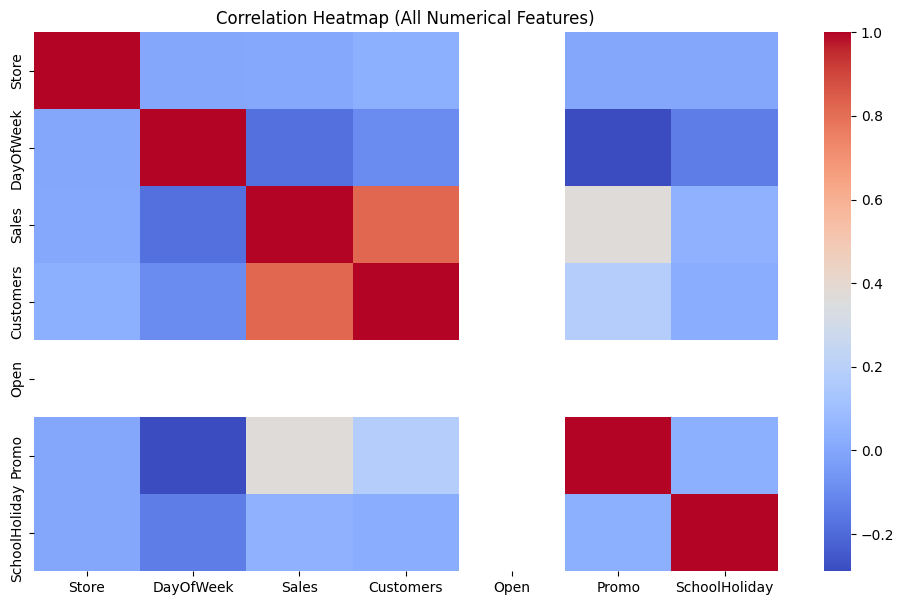

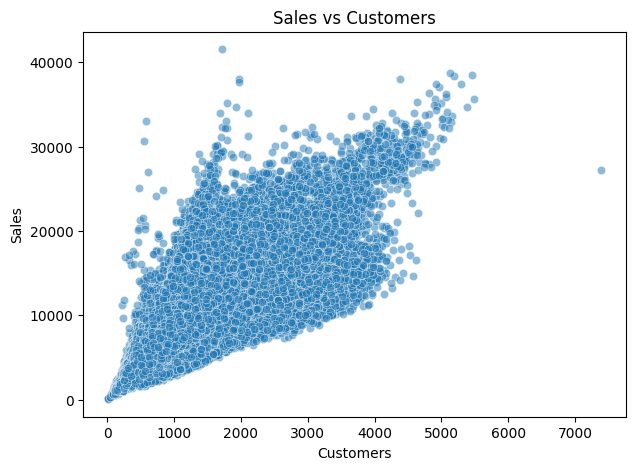

In [ ]:
# 2.5 DATA EXPLORATION REPORT

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use merged dataset if available
try:
    df_rep = df_train_store.copy()
except NameError:
    df_rep = df_train_clean.copy()

# ---------------------------------------------
# FUNCTION: Data Exploration Summary
# ---------------------------------------------
def generate_data_exploration_report(df):
    print("====================================================")
    print("              DATA EXPLORATION REPORT               ")
    print("====================================================\n")

    # ------------------------------
    # 1. Basic Info
    # ------------------------------
    print("1) BASIC INFORMATION\n")
    print("Number of Rows:", df.shape[0])
    print("Number of Columns:", df.shape[1])
    print("\nColumn Data Types:")
    print(df.dtypes)
    print("\n")

    # ------------------------------
    # 2. Missing Values
    # ------------------------------
    print("2) MISSING VALUES\n")
    missing = df.isnull().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")
    print("\n")

    # ------------------------------
    # 3. Unique Values
    # ------------------------------
    print("3) UNIQUE VALUES\n")
    unique_vals = df.nunique().sort_values(ascending=False)
    print(unique_vals)
    print("\n")

    # ------------------------------
    # 4. Statistical Summary
    # ------------------------------
    print("4) STATISTICAL SUMMARY (NUMERICAL FEATURES)\n")
    display(df.describe())
    print("\n")

    # ------------------------------
    # 5. Top Correlations
    # ------------------------------
    if 'Sales' in df.columns:
        print("5) TOP CORRELATIONS WITH SALES\n")
        # ✅ Only use numeric columns to avoid 'could not convert string to float'
        num_df = df.select_dtypes(include=[np.number])
        corr = num_df.corr()['Sales'].sort_values(ascending=False)
        display(corr)
        print("\n")

    # ------------------------------
    # 6. Outlier Detection
    # ------------------------------
    print("6) BASIC OUTLIER CHECK (SALES & CUSTOMERS)\n")
    num_cols = [col for col in ['Sales', 'Customers'] if col in df.columns]

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]

        print(f"Column: {col}")
        print(f"  IQR: {IQR:.2f}")
        print(f"  Outliers detected: {outliers.shape[0]}")
        print()

    print("\n==================== END OF REPORT ====================")


# ---------------------------------------------
# RUN THE DATA EXPLORATION REPORT
# ---------------------------------------------
generate_data_exploration_report(df_rep)


# ---------------------------------------------
# OPTIONAL: VISUAL SUMMARY
# ---------------------------------------------
# Correlation Heatmap (numeric columns only)
num_df_rep = df_rep.select_dtypes(include=[np.number])

plt.figure(figsize=(12,7))
sns.heatmap(num_df_rep.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (All Numerical Features)")
plt.savefig("../graphs/2_5_5_1-CM_numeric columns only.png", dpi=300, bbox_inches="tight")
plt.show()

# Sales vs Customers
if 'Sales' in df_rep.columns and 'Customers' in df_rep.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Customers', y='Sales', data=df_rep, alpha=0.5)
    plt.title("Sales vs Customers")
    plt.savefig("../graphs/2_5_5_2-Sales vs Customers.png", dpi=300, bbox_inches="tight")
    plt.show()


## 3. Data Preparation

In [42]:
# 3. DATA PREPARATION
import pandas as pd
from sklearn.model_selection import train_test_split

# Use merged train+store; if not present, create it from earlier objects
try:
    df_prep = df_train_store.copy()
    df_test_prep = df_test_store.copy()
except NameError:
    # Fallback if not already merged (defensive)
    tmp_stores = stores_df.copy()
    if 'Store_ID' in tmp_stores.columns and 'Store' not in tmp_stores.columns:
        tmp_stores = tmp_stores.rename(columns={'Store_ID': 'Store'})
    df_prep = df_train_clean.merge(tmp_stores, on='Store', how='left')
    df_test_prep = df_test.merge(tmp_stores, on='Store', how='left')

# Ensure Date fields are datetime
df_prep['Date'] = pd.to_datetime(df_prep['Date'])
df_test_prep['Date'] = pd.to_datetime(df_test_prep['Date'])

if 'Store_Open_Date' in df_prep.columns:
    df_prep['Store_Open_Date'] = pd.to_datetime(df_prep['Store_Open_Date'], errors='coerce')
if 'Store_Open_Date' in df_test_prep.columns:
    df_test_prep['Store_Open_Date'] = pd.to_datetime(df_test_prep['Store_Open_Date'], errors='coerce')

# 3.0.1 HANDLE CATEGORICAL / HOLIDAY VARIABLES

# Map StateHoliday: '0'->0, 'a'->1, 'b'->2, 'c'->3 (Rossmann style)
if 'StateHoliday' in df_prep.columns:
    df_prep['StateHoliday'] = df_prep['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
    # fill missing with 0 (no holiday) before casting
    df_prep['StateHoliday'] = df_prep['StateHoliday'].fillna(0).astype(int)

if 'StateHoliday' in df_test_prep.columns:
    df_test_prep['StateHoliday'] = df_test_prep['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})
    df_test_prep['StateHoliday'] = df_test_prep['StateHoliday'].fillna(0).astype(int)

# Ensure Promo and SchoolHoliday and Open are numeric
for col in ['Promo', 'SchoolHoliday', 'Open']:
    if col in df_prep.columns:
        # fill NaNs with the mode (most frequent value) then cast to int
        df_prep[col] = df_prep[col].fillna(df_prep[col].mode()[0]).astype(int)
    if col in df_test_prep.columns:
        df_test_prep[col] = df_test_prep[col].fillna(df_test_prep[col].mode()[0]).astype(int)

# 3.0.2 DATE-BASED FEATURES

for df_ in [df_prep, df_test_prep]:
    df_['Year'] = df_['Date'].dt.year
    df_['Month'] = df_['Date'].dt.month
    df_['Day'] = df_['Date'].dt.day
    df_['WeekOfYear'] = df_['Date'].dt.isocalendar().week.astype(int)

    # Store age in days at the time of the record
    if 'Store_Open_Date' in df_.columns:
        df_['StoreAgeDays'] = (df_['Date'] - df_['Store_Open_Date']).dt.days
        df_['StoreAgeDays'] = df_['StoreAgeDays'].fillna(df_['StoreAgeDays'].median())
    else:
        df_['StoreAgeDays'] = 0

# 3.0.3 HANDLE REMAINING MISSING VALUES

# For numeric columns, fill remaining NaNs with median
numeric_cols = df_prep.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    median_val = df_prep[col].median()
    df_prep[col].fillna(median_val, inplace=True)
    if col in df_test_prep.columns:
        df_test_prep[col].fillna(median_val, inplace=True)

# For object columns, fill NaNs with 'Unknown'
object_cols = df_prep.select_dtypes(include=['object']).columns
for col in object_cols:
    df_prep[col].fillna('Unknown', inplace=True)
    if col in df_test_prep.columns:
        df_test_prep[col].fillna('Unknown', inplace=True)

# 3.0.4 FEATURE SELECTION & ENCODING

# Target variable
TARGET_COL = 'Sales'

# Columns that should NOT go into the model directly
cols_to_drop = []

# Drop Store_Open_Date and raw Date (we use derived features instead)
for col in ['Store_Open_Date', 'Date']:
    if col in df_prep.columns:
        cols_to_drop.append(col)

# ID-like columns that are not useful as numeric features
for col in ['Sale_ID', 'Product_ID']:
    if col in df_prep.columns:
        cols_to_drop.append(col)

# Remove duplicates from cols_to_drop
cols_to_drop = list(set(cols_to_drop))

print("Columns being dropped from features:", cols_to_drop)

# Build feature matrix X and target y
X = df_prep.drop(columns=[TARGET_COL] + cols_to_drop, errors='ignore')
y = df_prep[TARGET_COL]

# Identify categorical columns for one-hot encoding
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns to be one-hot encoded:", cat_cols)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Prepare test set with same transformations
X_test = df_test_prep.drop(columns=cols_to_drop, errors='ignore')
X_test_encoded = pd.get_dummies(X_test, columns=[c for c in cat_cols if c in X_test.columns], drop_first=True)

# Align train and test columns
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print("Final training feature shape:", X_encoded.shape)
print("Final test feature shape:", X_test_encoded.shape)

# 3.0.5 TRAIN / VALIDATION SPLIT

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train length:", len(y_train))
print("y_val length:", len(y_val))


C:\Users\reser\AppData\Local\Temp\ipykernel_12648\252745764.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep[col].fillna(median_val, inplace=True)
C:\Users\reser\AppData\Local\Temp\ipykernel_12648\252745764.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Columns being dropped from features: ['Date', 'Store_Open_Date']
Categorical columns to be one-hot encoded: ['Store_Name', 'Store_City', 'Store_Location']
Final training feature shape: (844338, 95)
Final test feature shape: (41088, 95)
X_train shape: (675470, 95)
X_val shape: (168868, 95)
y_train length: 675470
y_val length: 168868


## Dataset Description

This project uses multiple datasets that collectively describe store operations, sales performance, promotional activity, and store-level characteristics. The data is structured into four main tables:

---

### **1.1 Train Dataset (`df_train`)**

This is the primary dataset used for model training. Each record represents daily sales activity for a store.

**Columns:**

| Column Name      | Description |
|------------------|-------------|
| **Store**        | Unique store identifier (numeric). |
| **DayOfWeek**    | Day of the week (1 = Monday, ..., 7 = Sunday). |
| **Date**         | Date of the record (YYYY-MM-DD). |
| **Sales**        | Target variable: total sales for the day. |
| **Customers**    | Number of customers on that day. |
| **Open**         | 1 = store open, 0 = closed. |
| **Promo**        | Whether the store was running a promotional activity (1 = yes, 0 = no). |
| **StateHoliday** | Indicates a state holiday (`0`, `a`, `b`, `c`). |
| **SchoolHoliday**| Indicates school holiday (1 = yes, 0 = no). |

This dataset is used to train forecasting models that predict store daily sales.

---

### **1.2 Test Dataset (`df_test`)**

This dataset contains the same structure as `df_train` **except for the target variable `Sales`**.

It is used to generate final predictions for submission.

**Columns:**

| Column Name      | Description |
|------------------|-------------|
| **Id**           | Row identifier used for submission. |
| **Store**        | Store ID. |
| **DayOfWeek**    | Day of the week. |
| **Date**         | Date of the record. |
| **Open**         | 1 = open, 0 = closed. |
| **Promo**        | Store promotional indicator. |
| **StateHoliday** | State holiday indicator. |
| **SchoolHoliday**| School holiday flag. |

---

### **1.3 Store Dataset (`stores_df`)**

Contains detailed metadata about each store. These attributes help improve predictions by adding important explanatory variables.

**Columns:**

| Column Name           | Description |
|-----------------------|-------------|
| **Store_ID**          | Unique store identifier (later merged as `Store`). |
| **Store_Name**        | Name of the store. |
| **Store_City**        | City where the store is located. |
| **Store_Location**    | Geographical/area classification. |
| **Store_Open_Date**   | Official opening date of the store. |

This dataset is merged with both train and test datasets to create enriched features such as store age.

---

### **1.4 Sales Dataset (`sales_df`)**

This dataset contains detailed product-level sales transactions. It can be used for supplementary analysis such as demand patterns.

**Columns:**

| Column Name      | Description |
|------------------|-------------|
| **Sale_ID**      | Unique sales transaction ID. |
| **Date**         | Date of the sale. |
| **Store_ID**     | Store identifier. |
| **Product_ID**   | Product sold. |
| **Units**        | Number of units sold. |
| **DayOfWeek**    | Day of week. |

Although not directly used in the main forecasting model, it provides additional context for exploratory analysis.

---

### **1.5 Overall Structure**

The combined datasets allow for:

- Time-series analysis  
- Promotional effect analysis  
- Holiday impact analysis  
- Store-level performance comparison  
- Feature engineering for predictive modelling  

These datasets form the foundation of the forecasting pipeline developed in this project.




## 3.1 Select Data

In [45]:
# 3.1 SELECT DATA

# We will select and prepare the final training dataset to be used for modelling.
# This section ensures that only valid, non-null, complete rows are used.

print("Initial merged training dataset shape:", df_prep.shape)

# 1. Select only stores that are open (Open = 1)

if 'Open' in df_prep.columns:
    df_selected = df_prep[df_prep['Open'] == 1].copy()
else:
    df_selected = df_prep.copy()

print("After selecting open stores:", df_selected.shape)

# 2. Select rows with valid Sales values (> 0)

if 'Sales' in df_selected.columns:
    df_selected = df_selected[df_selected['Sales'] > 0].copy()

print("After removing zero or negative sales rows:", df_selected.shape)

# 3. Select only the required columns
# We exclude identifier columns and raw date fields because we will use engineered features
columns_to_remove = [
    'Date', 'Store_Open_Date',
    'Sale_ID', 'Product_ID'
]

# Remove columns only if they actually exist
columns_to_remove = [col for col in columns_to_remove if col in df_selected.columns]

df_selected = df_selected.drop(columns=columns_to_remove, errors='ignore')

print("After dropping unnecessary columns:", df_selected.shape)

# 4. Final preview of selected dataset

print("\nSelected dataset information:")
df_selected.info()

print("\nPreview of selected training data:")
display(df_selected.head())

# This selected dataframe will be used for the modelling section.


Initial merged training dataset shape: (844338, 18)
After selecting open stores: (844338, 18)
After removing zero or negative sales rows: (844338, 18)
After dropping unnecessary columns: (844338, 16)

Selected dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           844338 non-null  int64  
 1   DayOfWeek       844338 non-null  int64  
 2   Sales           844338 non-null  int64  
 3   Customers       844338 non-null  int64  
 4   Open            844338 non-null  int64  
 5   Promo           844338 non-null  int64  
 6   StateHoliday    844338 non-null  int64  
 7   SchoolHoliday   844338 non-null  int64  
 8   Store_Name      844338 non-null  object 
 9   Store_City      844338 non-null  object 
 10  Store_Location  844338 non-null  object 
 11  Year            844338 non-null  int32  
 12  Month    

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Store_Name,Store_City,Store_Location,Year,Month,Day,WeekOfYear,StoreAgeDays
0,1,5,5263,555,1,1,0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,2015,7,31,31,8351.0
1,2,5,6064,625,1,1,0,1,Maven Toys Monterrey 1,Monterrey,Residential,2015,7,31,31,7400.0
2,3,5,8314,821,1,1,0,1,Maven Toys Guadalajara 2,Guadalajara,Commercial,2015,7,31,31,5695.0
3,4,5,13995,1498,1,1,0,1,Maven Toys Saltillo 1,Saltillo,Downtown,2015,7,31,31,5690.0
4,5,5,4822,559,1,1,0,1,Maven Toys La Paz 1,La Paz,Downtown,2015,7,31,31,5174.0


## 3.2 Clean Data

In [46]:
# 3.2 CLEAN DATA
import numpy as np

print("Shape before cleaning:", df_selected.shape)

# Make a working copy
df_clean = df_selected.copy()

# 1. HANDLE MISSING VALUES

print("\nMissing values BEFORE cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Numeric columns: fill NaNs with median
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

# Categorical columns: fill NaNs with 'Unknown'
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    df_clean[col].fillna('Unknown', inplace=True)

print("\nMissing values AFTER cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# 2. REMOVE DUPLICATES

before_dups = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
after_dups = df_clean.shape[0]

print(f"\nDuplicates removed: {before_dups - after_dups}")
print("Shape after removing duplicates:", df_clean.shape)

# 3. HANDLE OUTLIERS (CAPPING)
# We cap extreme values for key numerical columns using the IQR rule

outlier_cols = [col for col in ['Sales', 'Customers', 'CompetitionDistance'] if col in df_clean.columns]

for col in outlier_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before_outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    df_clean[col] = df_clean[col].clip(lower=lower, upper=upper)
    after_outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()

    print(f"\nColumn: {col}")
    print(f"  IQR: {IQR:.2f}")
    print(f"  Outliers before capping: {before_outliers}")
    print(f"  Outliers after capping: {after_outliers}")

print("\nFinal cleaned dataset shape:", df_clean.shape)

print("\nCleaned data preview:")
display(df_clean.head())


Shape before cleaning: (844338, 16)

Missing values BEFORE cleaning:
Series([], dtype: int64)


C:\Users\reser\AppData\Local\Temp\ipykernel_12648\616847499.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
C:\Users\reser\AppData\Local\Temp\ipykernel_12648\616847499.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


Missing values AFTER cleaning:
Series([], dtype: int64)

Duplicates removed: 0
Shape after removing duplicates: (844338, 16)

Column: Sales
  IQR: 3501.00
  Outliers before capping: 30769
  Outliers after capping: 0

Column: Customers
  IQR: 374.00
  Outliers before capping: 40853
  Outliers after capping: 0

Final cleaned dataset shape: (844338, 16)

Cleaned data preview:


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Store_Name,Store_City,Store_Location,Year,Month,Day,WeekOfYear,StoreAgeDays
0,1,5,5263.0,555,1,1,0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,2015,7,31,31,8351.0
1,2,5,6064.0,625,1,1,0,1,Maven Toys Monterrey 1,Monterrey,Residential,2015,7,31,31,7400.0
2,3,5,8314.0,821,1,1,0,1,Maven Toys Guadalajara 2,Guadalajara,Commercial,2015,7,31,31,5695.0
3,4,5,13611.5,1454,1,1,0,1,Maven Toys Saltillo 1,Saltillo,Downtown,2015,7,31,31,5690.0
4,5,5,4822.0,559,1,1,0,1,Maven Toys La Paz 1,La Paz,Downtown,2015,7,31,31,5174.0


## 3.3 Construct Data

In [47]:
# 3.3 CONSTRUCT DATA

from sklearn.model_selection import train_test_split
import pandas as pd

# Start from the cleaned dataset
try:
    df_construct = df_clean.copy()
except NameError:
    # Fallback in case df_clean doesn't exist for some reason
    df_construct = df_selected.copy()

print("Shape of data going into construction:", df_construct.shape)

# 1. DEFINE TARGET AND DROP UNUSED COLUMNS

TARGET_COL = 'Sales'

# Columns that should not be used as predictors
drop_cols = []

# ID-like columns
for col in ['Id', 'Sale_ID', 'Product_ID']:
    if col in df_construct.columns:
        drop_cols.append(col)

# (Date/Store_Open_Date are already dropped earlier, but keep defensive)
for col in ['Date', 'Store_Open_Date']:
    if col in df_construct.columns:
        drop_cols.append(col)

drop_cols = list(set(drop_cols))  # remove duplicates

print("Columns dropped from features:", drop_cols)

# Split into features and target
X = df_construct.drop(columns=[TARGET_COL] + drop_cols, errors='ignore')
y = df_construct[TARGET_COL]

print("Feature matrix shape before encoding:", X.shape)

# 2. IDENTIFY NUMERIC & CATEGORICAL COLUMNS

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric feature columns:", num_cols)
print("Categorical feature columns:", cat_cols)

# 3. ENCODE CATEGORICAL VARIABLES (ONE-HOT ENCODING)

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
print("Feature matrix shape AFTER encoding:", X_encoded.shape)

# 4. TRAIN / VALIDATION SPLIT

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print("\nCONSTRUCTED DATA SUMMARY")
print("------------------------")
print("X_train shape:", X_train.shape)
print("X_val shape:  ", X_val.shape)
print("y_train length:", len(y_train))
print("y_val length:  ", len(y_val))

print("\nPreview of X_train:")
display(X_train.head())

print("\nPreview of y_train:")
display(y_train.head())


Shape of data going into construction: (844338, 16)
Columns dropped from features: []
Feature matrix shape before encoding: (844338, 15)

Numeric feature columns: ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear', 'StoreAgeDays']
Categorical feature columns: ['Store_Name', 'Store_City', 'Store_Location']
Feature matrix shape AFTER encoding: (844338, 95)

CONSTRUCTED DATA SUMMARY
------------------------
X_train shape: (675470, 95)
X_val shape:   (168868, 95)
y_train length: 675470
y_val length:   168868

Preview of X_train:


,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,Store_City_Toluca,Store_City_Tuxtla Gutierrez,Store_City_Unknown,Store_City_Villahermosa,Store_City_Xalapa,Store_City_Zacatecas,Store_Location_Commercial,Store_Location_Downtown,Store_Location_Residential,Store_Location_Unknown
308140,106,6,515,1,0,0,0,2014,8,9,...,False,False,True,False,False,False,False,False,False,True
32793,344,6,1054,1,0,0,0,2015,6,27,...,False,False,True,False,False,False,False,False,False,True
585299,229,1,915,1,1,0,1,2013,10,7,...,False,False,True,False,False,False,False,False,False,True
224730,617,1,758,1,1,0,0,2014,11,24,...,False,False,True,False,False,False,False,False,False,True
571561,1048,2,525,1,1,0,0,2013,10,22,...,False,False,True,False,False,False,False,False,False,True



Preview of y_train:


308140     5079.0
32793      8094.0
585299    11959.0
224730    10038.0
571561     6647.0
Name: Sales, dtype: float64

## 3.4 Integrate Data

In [48]:
# 3.4 INTEGRATE DATA
# Goal: Ensure train and test data share the same feature structure
#       and are ready for use in the modelling step.

import pandas as pd

# 1) Start from the cleaned/constructed TRAIN data
print("Train feature matrix (X_encoded) shape:", X_encoded.shape)

# 2) Prepare the TEST data using the same transformations

# Make a working copy of test-prepared data
try:
    df_test_int = df_test_prep.copy()
except NameError:
    # Defensive fallback if df_test_prep not found
    df_test_int = df_test.copy()

print("Raw integrated test data shape (df_test_int):", df_test_int.shape)

# Drop the same non-feature columns as in train (drop_cols from 3.3)
test_drop_cols = [col for col in drop_cols if col in df_test_int.columns]
print("Dropping from TEST:", test_drop_cols)

X_test = df_test_int.drop(columns=test_drop_cols, errors='ignore')

# Make sure we don't accidentally have Sales in test
if 'Sales' in X_test.columns:
    X_test = X_test.drop(columns=['Sales'])

print("Test feature matrix BEFORE encoding shape:", X_test.shape)

# 3) Apply one-hot encoding to categorical columns in TEST
#    using the same categorical columns as train (cat_cols from 3.3),
#    but only if they exist in test.
test_cat_cols = [c for c in cat_cols if c in X_test.columns]

X_test_encoded = pd.get_dummies(
    X_test,
    columns=test_cat_cols,
    drop_first=True
)

print("Test feature matrix AFTER own encoding shape:", X_test_encoded.shape)

# 4) Align TEST columns to TRAIN columns
#    Any missing columns in test will be filled with 0,
#    and any extra columns in test will be dropped.
X_test_aligned = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print("\nFINAL INTEGRATED DATA SHAPES")
print("----------------------------")
print("Train features (X_encoded):     ", X_encoded.shape)
print("Test features (X_test_aligned):", X_test_aligned.shape)

# Optional: quick sanity checks
print("\nFirst 5 columns of train:", list(X_encoded.columns[:5]))
print("First 5 columns of test: ", list(X_test_aligned.columns[:5]))

# These final integrated matrices will be used in the modelling section:
#   - X_train, X_val, y_train, y_val   (from previous step)
#   - X_test_aligned                  (for making final predictions)


Train feature matrix (X_encoded) shape: (844338, 95)
Raw integrated test data shape (df_test_int): (41088, 17)
Dropping from TEST: []
Test feature matrix BEFORE encoding shape: (41088, 17)
Test feature matrix AFTER own encoding shape: (41088, 83)

FINAL INTEGRATED DATA SHAPES
----------------------------
Train features (X_encoded):      (844338, 95)
Test features (X_test_aligned): (41088, 95)

First 5 columns of train: ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo']
First 5 columns of test:  ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo']


## 3.5 Format Data

In [50]:
# 3.5 FORMAT DATA
# Goal:
# - Ensure consistent data types
# - Scale/standardize numerical features (useful for Linear Regression, etc.)
# - Keep final datasets ready for modelling

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

print("Initial shapes:")
print("  X_train:", X_train.shape)
print("  X_val:  ", X_val.shape)
print("  X_test_aligned:", X_test_aligned.shape)

# 1. ENSURE CONSISTENT DATA TYPES

# Convert all boolean-like columns to int (0/1)
def convert_bool_like_to_int(df):
    for col in df.columns:
        # If it's numeric with only 0/1 or NaN, cast to int
        if df[col].dtype in [np.float64, np.int64]:
            unique_vals = set(df[col].dropna().unique().tolist())
            if unique_vals.issubset({0, 1}):
                df[col] = df[col].astype(int)
    return df

X_train = convert_bool_like_to_int(X_train)
X_val = convert_bool_like_to_int(X_val)
X_test_aligned = convert_bool_like_to_int(X_test_aligned)

# 2. SCALE / STANDARDIZE NUMERICAL FEATURES
# We will scale only the numerical columns (not the one-hot encoded dummies),
# using the mean and std from X_train.

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nNumeric columns to be scaled (first 10):")
print(numeric_cols[:10])

scaler = StandardScaler()

# Fit on train, transform train/val/test
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test_aligned.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val_scaled[numeric_cols]   = scaler.transform(X_val[numeric_cols])
X_test_scaled[numeric_cols]  = scaler.transform(X_test_aligned[numeric_cols])

# 3. FINAL SUMMARY

print("\nFORMATTED DATA SUMMARY")
print("----------------------")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:  ", X_val_scaled.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)
print("y_train length:", len(y_train))
print("y_val length:  ", len(y_val))

print("\nSample of formatted X_train_scaled:")
display(X_train_scaled.head())

# These are the final formatted datasets to use in the modelling section:
#   - X_train_scaled, y_train
#   - X_val_scaled,   y_val
#   - X_test_scaled   (for predictions)


Initial shapes:
  X_train: (675470, 95)
  X_val:   (168868, 95)
  X_test_aligned: (41088, 95)

Numeric columns to be scaled (first 10):
['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'WeekOfYear', 'StoreAgeDays']

FORMATTED DATA SUMMARY
----------------------
X_train_scaled shape: (675470, 95)
X_val_scaled shape:   (168868, 95)
X_test_scaled shape:  (41088, 95)
y_train length: 675470
y_val length:   168868

Sample of formatted X_train_scaled:


,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,Store_City_Toluca,Store_City_Tuxtla Gutierrez,Store_City_Unknown,Store_City_Villahermosa,Store_City_Xalapa,Store_City_Zacatecas,Store_Location_Commercial,Store_Location_Downtown,Store_Location_Residential,Store_Location_Unknown
308140,-1.407065,1.438782,-0.742062,0.0,-0.898317,-0.029908,-0.490130,2014,8,9,...,False,False,True,False,False,False,False,False,False,True
32793,-0.667102,1.438782,1.078885,0.0,-0.898317,-0.029908,-0.490130,2015,6,27,...,False,False,True,False,False,False,False,False,False,True
585299,-1.024647,-1.462327,0.609290,0.0,1.113193,-0.029908,2.040275,2013,10,7,...,False,False,True,False,False,False,False,False,False,True
224730,0.181679,-1.462327,0.078884,0.0,1.113193,-0.029908,-0.490130,2014,11,24,...,False,False,True,False,False,False,False,False,False,True
571561,1.521696,-0.882105,-0.708279,0.0,1.113193,-0.029908,-0.490130,2013,10,22,...,False,False,True,False,False,False,False,False,False,True


## 4. Modelling

## 4.1 Select Modelling

## 4.2 Techniques

## 4.3 Generate Test Design

## 4.4 Build Model

## 4.5 Assess Model

## 5. Evaluation

## 5.1 Evaluate Results

## 5.2 Review Process

## 5.3 Determine Next Steps

## 6. Deployment / Finalization

## 6.1 Plan Deployment

## 6.2 Plan Monitoring and Maintenance

## 6.3 Produce Final Report

## 6.4 Review Project